# TODO: Task 2 - Approximating linear vector fields

In [112]:
# All imports (TODO: Remove the ones that you don't use and add appropriate packages if necessary)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
import utils
%reload_ext autoreload
%autoreload 2

# Load data
x0 = np.loadtxt('../../data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/linear_vectorfield_data_x1.txt')

### TODO: Part 1 - Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

In [80]:
delta_T = 0.1

v = (x1-x0)/delta_T
#solve_ivp()
x1[0:1,:]

array([[-0.14754604,  0.40615976]])

In [5]:
x0[0:1,:]

array([[-0.16595599,  0.44064899]])

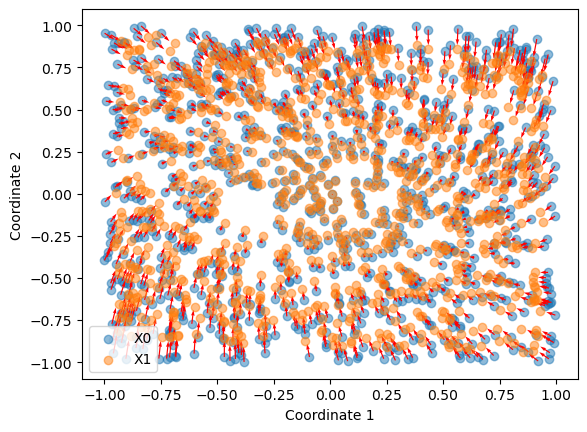

In [6]:
plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5)
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5)
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

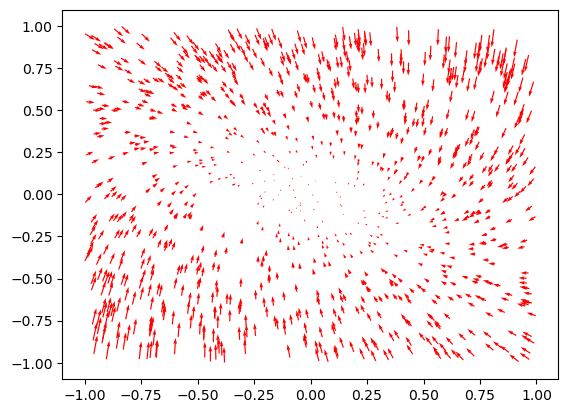

In [13]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')

updated


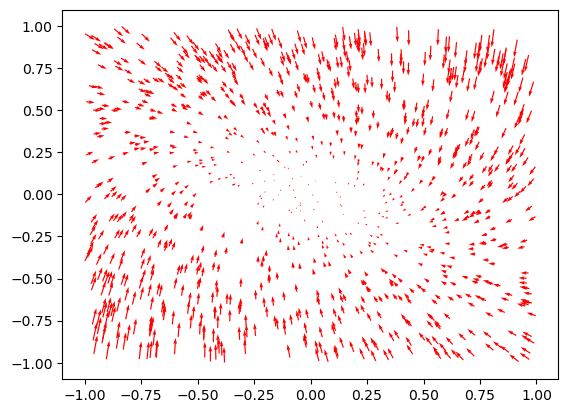

In [14]:
approx = utils.transform(x0, utils.least_squares(x0,v))
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'r')

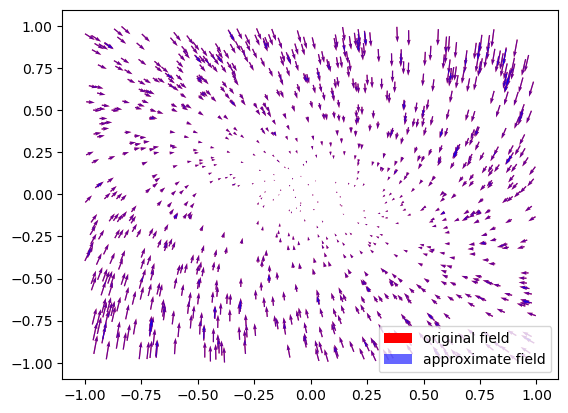

In [25]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

In [20]:
utils.least_squares(x0,v)

array([[-4.93552450e-01, -4.63823204e-01],
       [ 2.31911527e-01, -9.57375731e-01],
       [-1.41086515e-09,  2.23922683e-09],
       [-1.41086321e-09,  2.23921872e-09]])

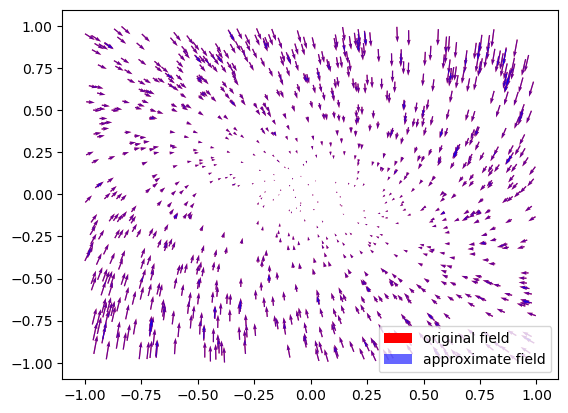

In [26]:
A_estim = utils.least_squares(x0,v)[0:2,0:2]
v_field_estim = x0@A_estim

plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], v_field_estim[:,0], v_field_estim[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

### TODO: Part 2 - Solve the linear system and compute the mean squared error

In [46]:
def f(t,y):
    return np.dot(y, A_estim)
    #return y@A_estim

In [102]:
def integrate_f(x_0, T):
    for i in range(len(x_0)):
        solve = solve_ivp(f,[0,T], x_0[i,:], t_eval= [T])
        if i == 0:
            x1_estim = solve.y.T
        else:
            x1_estim = np.row_stack((x1_estim,solve.y.T))
        #print(solve.y.T)
    return x1_estim

In [105]:
approx_x1 = integrate_f(x0, delta_T)

In [111]:
approx_x1[0:1,:] - x1

array([[-0.14837719,  0.40735825]])

In [117]:
def err():
    error = 0
    for i in range(len(x1)):
        print(error)
        error += cdist(x1[i:i+1,:],approx_x1[i:i+1,:],'sqeuclid')

    return error/len(x1)

In [118]:
err()

0
[[2.12717944e-06]]
[[2.52460471e-05]]
[[5.63153462e-05]]
[[6.69289201e-05]]
[[6.71345686e-05]]
[[6.85200178e-05]]
[[7.23332513e-05]]
[[7.6780134e-05]]
[[7.68790271e-05]]
[[9.93743207e-05]]
[[0.00013249]]
[[0.00013337]]
[[0.00016484]]
[[0.00020579]]
[[0.00020934]]
[[0.00021988]]
[[0.00023064]]
[[0.00023143]]
[[0.00024695]]
[[0.00025049]]
[[0.00027687]]
[[0.00027915]]
[[0.00028823]]
[[0.00029082]]
[[0.00031011]]
[[0.00031461]]
[[0.0003286]]
[[0.00034347]]
[[0.00035035]]
[[0.00035527]]
[[0.00036599]]
[[0.00036664]]
[[0.00037416]]
[[0.00037559]]
[[0.00038847]]
[[0.00039154]]
[[0.0003938]]
[[0.00040561]]
[[0.00040929]]
[[0.00042108]]
[[0.00043312]]
[[0.00043401]]
[[0.00043924]]
[[0.00045207]]
[[0.00045618]]
[[0.00046125]]
[[0.00046144]]
[[0.00046911]]
[[0.00047947]]
[[0.00048593]]
[[0.00048688]]
[[0.00048979]]
[[0.00050298]]
[[0.00050731]]
[[0.0005358]]
[[0.00056124]]
[[0.00058028]]
[[0.00058298]]
[[0.00060889]]
[[0.00061371]]
[[0.0006615]]
[[0.0006872]]
[[0.00069435]]
[[0.00070467]]
[[0.

array([[9.95755714e-06]])

###  TODO: Part 3 - Visualize trajectories and phase portrait 